<a href="https://colab.research.google.com/github/SibeleTatiana/D_L-Models/blob/main/Predi%C3%A7%C3%A3o_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predição Fraude:
- Exploração de Dados
- Pré-processamento
- Engenharia de Features
- Modelagem
- Validação

1 - Configurando o Ambiente - Importando bibliotecas.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

2 - Importação do Banco de Dados.

In [12]:
file_path = '/home/creditcard.csv'

credit_data = pd.read_csv(file_path)

print(credit_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

3 - Distribuição das Classes:

Verificando a distribuição das classes (fraude vs. não fraude) para entender o desbalanceamento dos dados.

Class
0    284315
1       492
Name: count, dtype: int64


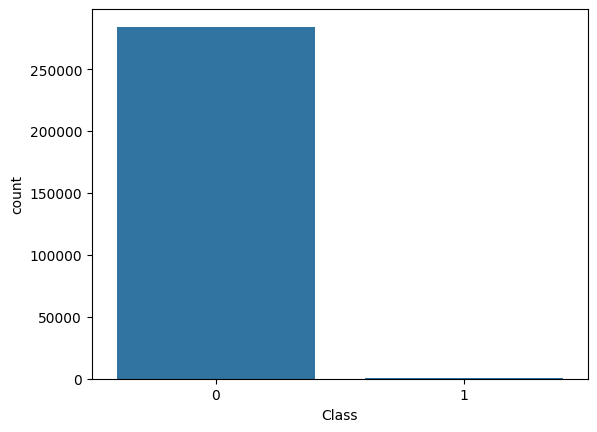

In [13]:
print(credit_data['Class'].value_counts())
sns.countplot(x='Class', data=credit_data)
plt.show()

4 - Estatísticas Descritivas:

Obtendo estatísticas descritivas para entender a distribuição dos dados.

In [14]:
print(credit_data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

5 - Correlação:

Analisando a correlação entre as variáveis para identificar quais podem ser mais relevantes.

In [15]:
from imblearn.over_sampling import SMOTE

# Separar as características e o alvo
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a nova distribuição
print(pd.Series(y_resampled).value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


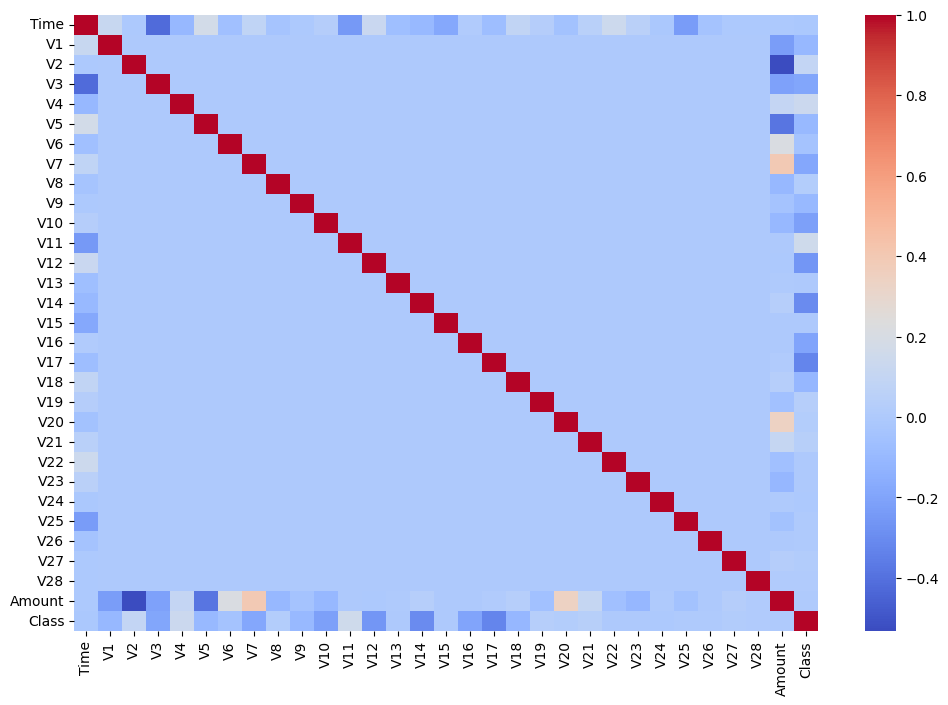

In [16]:
corr_matrix = credit_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [17]:
# Escolha uma técnica de balanceamento
# Exemplo com SMOTE
# Verificar a nova distribuição

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Treinar o modelo de deep learning
# Aqui você pode definir e treinar seu modelo de deep learning
# Exemplo com Keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.4982 - loss: 81.8636 - val_accuracy: 0.4995 - val_loss: 0.6926
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.5006 - loss: 0.6977 - val_accuracy: 0.5013 - val_loss: 0.6927
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.4984 - loss: 0.6974 - val_accuracy: 0.4995 - val_loss: 0.6926
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.5023 - loss: 0.6958 - val_accuracy: 0.5014 - val_loss: 0.6926
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.5011 - loss: 0.6997 - val_accuracy: 0.5014 - val_loss: 0.6925
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.4991 - loss: 0.6936 - val_accuracy: 0.4996 - val_loss: 0.6926
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.4989 - loss: 0.6929 - val_accuracy: 0.4996 - val_loss: 0.6925
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy:

6 - Engenharia de Features

Normalização/Escalonamento: Escalonando as features numéricas para que todas tenham a mesma escala.

In [18]:
scaler = StandardScaler()
credit_data['Amount'] = scaler.fit_transform(credit_data['Amount'].values.reshape(-1, 1))

7 - Divisão dos Dados: Dividindo os dados em conjuntos de treino e teste.

In [19]:
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

8 - Modelagem

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

9 - Validação

Matriz de Confusão: Para visualizar o desempenho do modelo.

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56862     2]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



10 - AUC-ROC: Para avaliar a capacidade do modelo de distinguir entre classes.

In [25]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_proba))

0.9476116663604103
